# 判別分析

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ

In [2]:
mean1 = [1, 3] 
mean2 = [3, 1]
cov = [[2.0, 0.1], [0.1, 0.1]]
x0 = np.random.multivariate_normal(mean1, cov, 25)
x1 = np.random.multivariate_normal(mean2, cov, 25)
x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

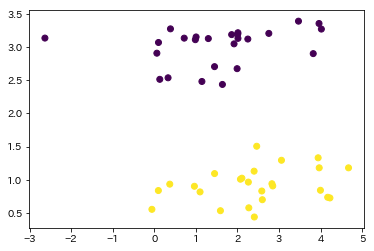

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

# 単純な線形判別

判別分析とは分類の分かっているデータがある際に、データの属性値に基づいて、この分類を判別する手法一般である。

その中でも線形判別分析は異なるグループを最もよく判別できる直線を求める手法である。

単純には、クラス中心を射影した点の間の分離度が大きい射影方向$\boldsymbol{w}$を求めれば良い。つまり、$\boldsymbol{w}^{\mathrm{T}} \boldsymbol{m}_{1} - \boldsymbol{w}^{\mathrm{T}} \boldsymbol{m}_{2} = \boldsymbol{w}^{\mathrm{T}} (\boldsymbol{m}_{1} - \boldsymbol{m}_{2})$が最大となるようにすればよい。$||\boldsymbol{w}||^{2} = 1$の制約のもとでは、$\hat{\boldsymbol{w}} \propto(\boldsymbol{m}_{1} - \boldsymbol{m}_{2})$となる。

In [4]:
X_train = x_train

X1 = X_train[y_train == 0]
X2 = X_train[y_train == 1]
m1 = np.mean(X1, axis=0)
m2 = np.mean(X2, axis=0)
w = m1 - m2

## 決定境界

決定境界は$\boldsymbol{m}_{1}$と$\boldsymbol{m}_{2}$の中点を通り、$\hat{\boldsymbol{w}}$に直交する直線である。

(-2, 7)

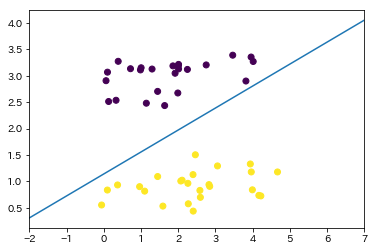

In [5]:
a = -w[0] / w[1]
b = 0.5 * (m1 + m2)
x0 =np.array([-2, 7]) 
x1 = a * (x0 - b[0]) + b[1]

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.plot(x0, x1)
plt.xlim(-2, 7)

# Fisherの線形判別

## 学習

Fisherの線形判別は、射影後のデータにおいて、クラス中心の分離度を大きく、かつクラス内分散を小さくするような射影方向$\boldsymbol{w}$を求める手法である。そのために以下の目的関数を最大化する。

$J = \frac{(m_{1} - m_{2})^{2}}{s_{1}^{2} + s_{2}^{2}}$

ただし、$m_{k}, s_{k}^{2}$はクラス$k$の平均, 分散であり、

$m_{k} = \frac{1}{N_{k}} \sum_{n \in C_{k}} \boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{n} = \boldsymbol{w}^{\mathrm{T}} (\frac{1}{N_{k}} \sum_{n \in C_{k}} \boldsymbol{x}_{n}) = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{m}_{k}$

$s_{k}^{2} = \frac{1}{N_{k}} \sum_{n \in C_{k}} (\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{n} - m_{k})^{2} = \frac{1}{N_{k}} \sum_{n \in C_{k}} (\boldsymbol{w}^{\mathrm{T}} (\boldsymbol{x}_{n} - \boldsymbol{m}_{k}))^{2}$

である。$J$は以下のように書ける。

\begin{eqnarray}
J &=& \frac{\boldsymbol{w}^{\mathrm{T}} S_{B} \boldsymbol{w}}{\boldsymbol{w}^{\mathrm{T}} S_{W} \boldsymbol{w}} \\
S_{B} &=& (\boldsymbol{m}_{1} - \boldsymbol{m}_{2}) (\boldsymbol{m}_{1} - \boldsymbol{m}_{2})^{\mathrm{T}} \\
S_{W} &=& \frac{1}{N_{1}} \sum_{n \in C_{1}} (\boldsymbol{x}_{n} - \boldsymbol{m}_{1}) (\boldsymbol{x}_{n} - \boldsymbol{m}_{1})^{\mathrm{T}} + \frac{1}{N_{2}} \sum_{n \in C_{2}} (\boldsymbol{x}_{n} - \boldsymbol{m}_{2}) (\boldsymbol{x}_{n} - \boldsymbol{m}_{2})^{\mathrm{T}} 
\end{eqnarray}

これを$||\boldsymbol{w}||^{2} = 1$の制約のもと最大化する。ラグランジュ乗数法を使うと、求める$\boldsymbol{w}$は$\hat{\boldsymbol{w}} \propto S_{w}^{-1} (\boldsymbol{m}_{1} - \boldsymbol{m}_{2})$となる。

In [6]:
Sw = np.cov(X1, rowvar=False, bias=True) + np.cov(X2, rowvar=False, bias=True)
w = np.dot(np.linalg.inv(Sw), m1 - m2)

## 決定境界

(-2, 7)

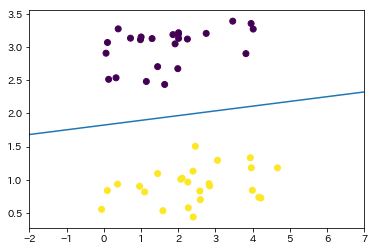

In [7]:
a = -w[0] / w[1]
b = 0.5 * (m1 + m2)
x0 =np.array([-2, 7]) 
x1 = a * (x0 - b[0]) + b[1]

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.plot(x0, x1)
plt.xlim(-2, 7)